# Starting Off

How does sklearn utilize numpy?

# How to build a Deep Neural Network with Python

## Model building steps:

1. Specify Architecture

2. Compile

3. Fit 

4. Predict

## Specify the architecture

In [ ]:
#instantiate the model
model = Sequential()
#create the input layer
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
#add one hidden layer
model.add(Dense(100, activation='relu'))
#add the final layer
model.add(Dense(1))

## Compiling a model 

- Specify the optimizer
    - Many options and mathematically complex
    - “Adam” is usually a good choice 
- Loss function
    - “mean_squared_error” common for regression

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Fitting a model

- Applying backpropagation and gradient descent with your data to update the weights
- Scaling data before fi!ing can ease optimization

In [1]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

Using TensorFlow backend.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/kc_feat_engineering_project_revamp/kc_housing_data_for_feat_engineering_lab.csv', index_col = 0)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


In [4]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'since_sold',
       ]

In [5]:
y = df['price']
X = df[features]

In [6]:
len(features)

20

- Store the number of columns in the predictors data to `n_cols`. This has been done for you.
- Start by creating a `Sequential` model called `model`.
- Use the `.add()` method on `model` to add a `Dense` layer.
- Add 50 units, specify `activation='relu'`, and the `input_shape` parameter to be the tuple `(n_cols,)` which means it has `n_cols` items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another `Dense` layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a `Dense` layer with a single node. Don't use any activation function here.

In [7]:
# Save the number of columns in predictors: n_cols
n_cols = len(features)

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

- Compile the model using `model.compile()`. Your `optimizer` should be `'adam'` and the `loss` should be `'mean_squared_error'`.

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


- Fit the `model`. Remember that the first argument is the predictive features (`predictors`), and the data to be predicted (`target`) is the second argument.

In [9]:
# Fit the model
model.fit(X,y)

Epoch 1/1
21600/21600 [==============================] - 2s 75us/step - loss: 141241996289.5170


## Classification Models


- ‘categorical_crossentropy’ loss function Similar to log loss: Lower is be!er
- Add metrics = [‘accuracy’] to compile step for easy-to- understand diagnostics
- Output layer has separate node for each possible outcome, and uses ‘so"max’ activation

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/cleaned_titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,1


In [11]:
predictors = df.drop(columns=['Survived'])
n_cols = predictors.shape[1]

- Convert `df.Survived` to a categorical variable using the `to_categorical()` function.

In [12]:
from keras.utils import to_categorical
# Convert the target to categorical: target
target = to_categorical(df.Survived)

In [13]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [14]:
n_cols

9

- Specify a `Sequential` model called `model`.
- Add a `Dense` layer with 32 nodes. Use `'relu'` as the `activation` and `(n_cols,)` as the `input_shape`.
- Add the `Dense` output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the `activation` should be `'softmax'`.
- Compile the model, using `'sgd'` as the `optimizer`, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the `X_train` and the `y_train`.

In [16]:
from keras.utils import to_categorical

# Convert the target to categorical: target

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#sgd = stochastic gradient descent
# Fit the model
model.fit(X_train, y_train)

Epoch 1/1
711/711 [==============================] - 0s 304us/step - loss: 3.6460 - acc: 0.5809


## Saving, reloading and using your Model

In [17]:
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('my_model.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]

OSError: Unable to open file (unable to open file: name = 'my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

- Create your predictions using the model's `.predict()` method on `X_test`.
- Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index `1`) of `predictions`. Store the result in `predicted_prob_true` and print it.

In [18]:
# Calculate predictions: predictions
predictions = model.predict(X_test)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[3.8297512e-04 1.0000000e+00 4.1366947e-01 1.4383215e-03 1.0000000e+00
 4.2490708e-04 1.0097281e-02 5.4348866e-03 1.0000000e+00 1.0000000e+00
 9.9999225e-01 6.6690743e-02 3.1139700e-07 4.8288694e-03 4.5042078e-04
 7.2296840e-01 1.0000000e+00 1.0611756e-03 9.9997354e-01 1.5028428e-03
 1.0000000e+00 1.0000000e+00 5.1995212e-06 3.1562802e-01 1.5809595e-03
 6.1334375e-02 1.5265548e-04 1.0051708e-03 9.9999297e-01 2.5152268e-03
 9.9999297e-01 8.7763963e-04 1.5809595e-03 9.9996197e-01 8.1321970e-02
 1.0000000e+00 9.9998403e-01 1.0000000e+00 1.7278912e-03 1.5809595e-03
 7.9545175e-04 6.8348809e-04 2.8781895e-02 7.5330870e-04 6.4636141e-01
 5.1850140e-01 9.9369472e-01 1.1380878e-03 3.6123619e-04 1.0000000e+00
 9.9999988e-01 5.1356484e-03 2.8992030e-03 1.2656149e-03 9.9980706e-01
 9.9994719e-01 6.5992763e-06 1.3959563e-05 7.9409383e-02 6.3221279e-04
 3.0874587e-03 2.0255984e-03 1.0000000e+00 9.5548958e-02 1.5524996e-03
 3.6208355e-01 5.1895961e-07 1.0000000e+00 1.0000000e+00 1.0000000e+00
 4.253

## Verify your model structure

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


## Let's play with Hyperparameter tuning

[Google Playground](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises)

## Hyperparameter Tuning 

    


- **Number of Hidden Layers**

*For many problems you can start with just one or two hidden layers it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. Very complex tasks, like image classification, will need dozens of layers.*


- **Number of Neurons per layer**

*The number of nuerons for the input and output layers are dependent on your data and the task. For hiddne layers, a common practice is to create a funnel with funnel with fewer and fewer neurons per layer.*

*In general, you will get more bang for your buck by adding on more layers than adding more neurons.*

- **[Activation Functions](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)**
    - Linear
    - Sigmoid
    - Softmax
    - Tanh
    - ReLu
    - elu
    
*In most cases you can use the ReLu activation function (or one of its variants) in the hidden layers. For the output layer, the softmax activation function is generally good for multiclass problems and the sigmouid function for binary classificatin problems. For regression tasks, you can simply use no activation function at all*

- [Selecting an optimizer](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
    - Adam
    - SGD
    - RMSprop
    - Adagrad



- **Learning Rate**

*If you set it too low, training will eventually converge, but it will do so slowly.*
*If you set it too high, it might acutally diverge.*
*If you set it slightly too high, it will converge at first but miss the local optima.*


- **Regularization** 
    - L1 and L2
    - Dropout
    
    *the most popular techniqure for deep neural networks. It is a fairly simple algorithm where at every training step, every neuron has a probability fo being teporarily "droppedout," meaning it will be completely ignored during this traing step, but it may be active during the next step.*
    
    - [Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
    
    *Just interrupt training whne its performance on the validation set starts dropping*
    
    


[Paper on selecting hyperparameters](https://arxiv.org/pdf/1206.5533v2.pdf)

# Fitting a Model with Keras

## Import  Modules 

In [20]:
# Create first network with Keras
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD


## Define Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

In [21]:
network = Sequential()

# Add a dropout layer for input layer
network.add(Dropout(0.2, input_shape=(n_cols,)))
# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu'))
# Add a dropout layer for previous hidden layer
network.add(Dropout(0.25))
# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(Dense(units=16, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
#Final Layer
network.add(Dense(2, activation='softmax'))

[Using GridSearchCV to tune Neural Networks](https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/)

## Compile model


In [22]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

[Keras Implementation of optimizers](https://keras.io/optimizers/)

[Impact of Learning Rate on MOdel Performance](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

In [23]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [24]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train, # Target
                      epochs=15, # Number of epochs
                      verbose=2, # Some output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 711 samples, validate on 178 samples
Epoch 1/15
 - 0s - loss: 5.2092 - acc: 0.3783 - val_loss: 4.0835 - val_acc: 0.3876
Epoch 2/15
 - 0s - loss: 4.3181 - acc: 0.3812 - val_loss: 3.2670 - val_acc: 0.3876
Epoch 3/15
 - 0s - loss: 3.4687 - acc: 0.3769 - val_loss: 2.4651 - val_acc: 0.3876
Epoch 4/15
 - 0s - loss: 2.8286 - acc: 0.3910 - val_loss: 1.7040 - val_acc: 0.3876
Epoch 5/15
 - 0s - loss: 2.7114 - acc: 0.3840 - val_loss: 1.1238 - val_acc: 0.3989
Epoch 6/15
 - 0s - loss: 2.1990 - acc: 0.3910 - val_loss: 1.0130 - val_acc: 0.4551
Epoch 7/15
 - 0s - loss: 1.9435 - acc: 0.4909 - val_loss: 0.8226 - val_acc: 0.6742
Epoch 8/15
 - 0s - loss: 1.7052 - acc: 0.5007 - val_loss: 0.8174 - val_acc: 0.6067
Epoch 9/15
 - 0s - loss: 1.9253 - acc: 0.5021 - val_loss: 0.7943 - val_acc: 0.6629
Epoch 10/15
 - 0s - loss: 1.6788 - acc: 0.5331 - val_loss: 0.7756 - val_acc: 0.6910
Epoch 11/15
 - 0s - loss: 1.6331 - acc: 0.4923 - val_loss: 0.7688 - val_acc: 0.7135
Epoch 12/15
 - 0s - loss: 1.6171 - acc:

In [25]:
X_test.shape

(178, 9)

In [26]:
score = network.evaluate(X_test, y_test, batch_size=128)


178/178 [==============================] - 0s 38us/step


In [27]:
print("\n%s: %.2f%%" % (network.metrics_names[1], score[1]*100))


acc: 69.10%


In [28]:
# calculate predictions
predictions = network.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [29]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

<Figure size 640x480 with 1 Axes>

https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

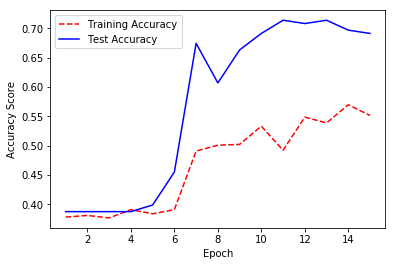

In [30]:
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

https://chrisalbon.com/deep_learning/keras/visualize_performance_history/

In [31]:




# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

ValueError: Error when checking input: expected dense_6_input to have shape (9,) but got array with shape (20,)

## Resources 

http://neuralnetworksanddeeplearning.com/
    
http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

https://chrisalbon.com/deep_learning/keras/visualize_neural_network_architecture/